In [158]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn.apionly as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
mpl.rcParams['figure.dpi'] = 120  # make plots bigger by default
from collections import defaultdict
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import datasets

# Step 0: Import Data
Process Data to make it more readable and clean

In [159]:
# First Import data into DataFrame to make it easier to use
data = pd.read_csv("wdbc.data",header = None)

# Next we add the appropriate column names based on "wdbc.names"
data.columns = ["ID","Diagnosis","Mean Radius","Mean Texture","Mean Perimeter","Mean Area","Mean Smoothness","Mean Compactness",
                "Mean Concavity","Mean Concave Points","Mean Symmetry","Mean Fractal Dimension","Radius SE", "Texture SE","Perimeter SE","Area SE","Smootheness Se"
               ,"Compactness SE","Concavity SE","Concave Points SE","Symmetry SE","Fractal Dimension SE", "Worst Radius","Worst Texture","Worst Perimeter","Worst Area",
               "Worst Smoothness", "Worst Compactness", "Worst Concavity","Worst Concave Points","Worst Symmetry","Worst Fractial Dimension"]


In [160]:
# outputing the first few lines of the dataframe
data.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractial Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Step 1: Finish Preparing Matrix
Display initial plot to show what could possibly be defining cause of the Malignant Tumors

Text(0,0.5,'Mean Radius')

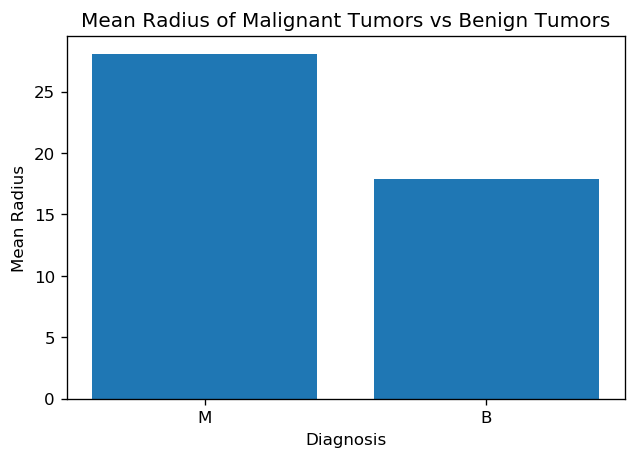

In [161]:
# Plot a possible correlation for possible factor that causes tumors to be diagnosed as either
# malignant or benign
plt.bar(data["Diagnosis"],data["Mean Radius"])
plt.title("Mean Radius of Malignant Tumors vs Benign Tumors")
plt.xlabel("Diagnosis")
plt.ylabel("Mean Radius")

([<matplotlib.patches.Wedge at 0x1a232c1780>,
 [Text(0.467623,1.10514,'Malignant'), Text(-0.428655,-1.01304,'Benign')])

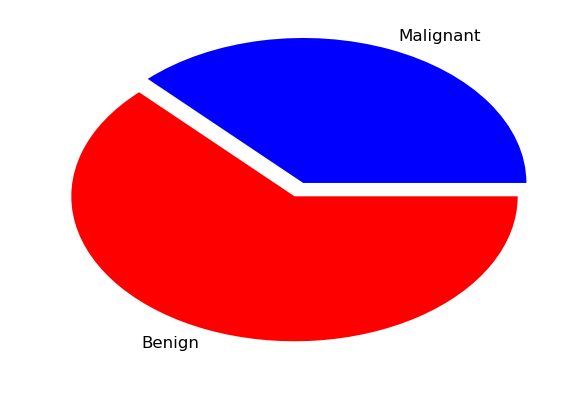

In [162]:
# This pie plot shows that there is a unbalance in the number of Malignant tumors seen
# vs the number of Benign tumors seen
number_m = len(data[data['Diagnosis'] == 'M'])
number_b = len(data[data['Diagnosis'] == 'B'])
colors = ['blue', 'red']
sizes = [number_m,number_b]
explode = (0.1, 0)
labels = 'Malignant', 'Benign'
plt.pie(sizes, explode=explode, labels=labels, colors=colors)



# Step 2: Evaluation of the Distribution Data
Here I create function that uses seaborns distplot function to examine the various feautures, separated by class, Malignant and Benign for all the Mean Features. These were helpful to use to look at the distribution of data, before the two predictive models were built. Please note: I am not sure why the legend is not appearing even though I make the call to show the legend in the function (see below).

In [163]:
def dist_plot (column):
    Malignant = data[data['Diagnosis'] == 'M']
    Benign = data[data['Diagnosis'] == 'B']
    sns.distplot(Malignant[column])
    sns.distplot(Benign[column])
    plt.legend()
    plt.title(column)
    plt.xlabel("Frequency")
    plt.ylabel("Radius")
    plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


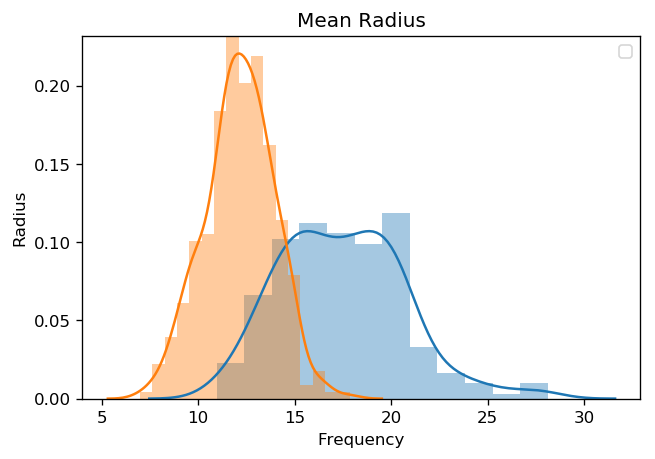

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


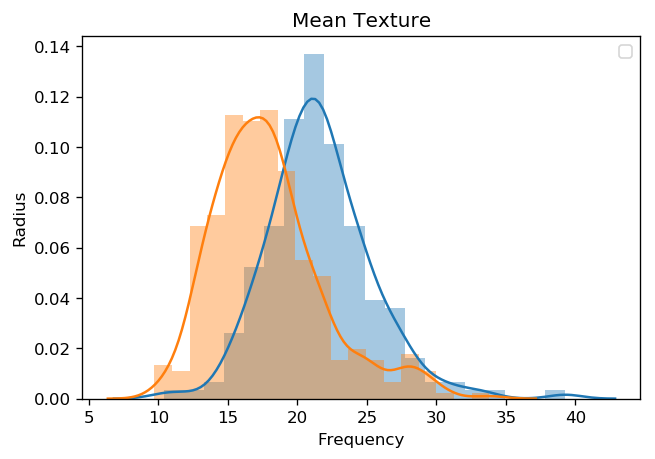

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


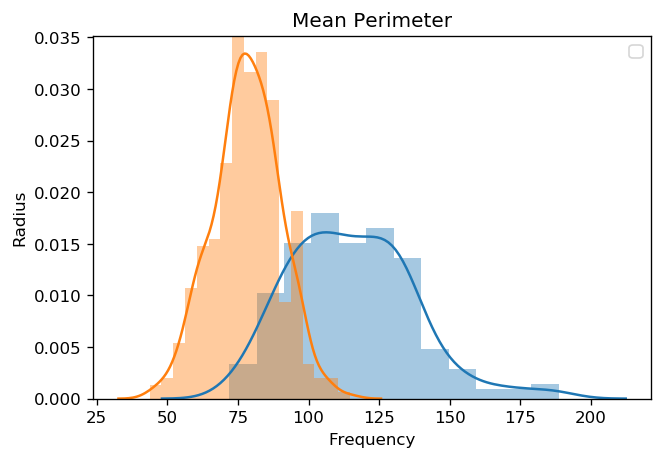

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


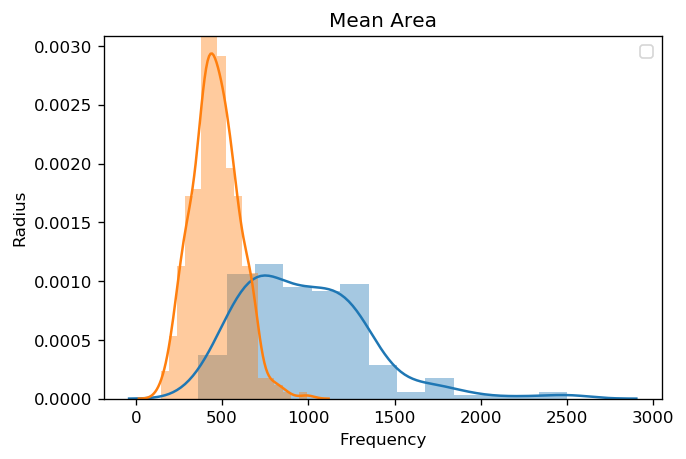

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


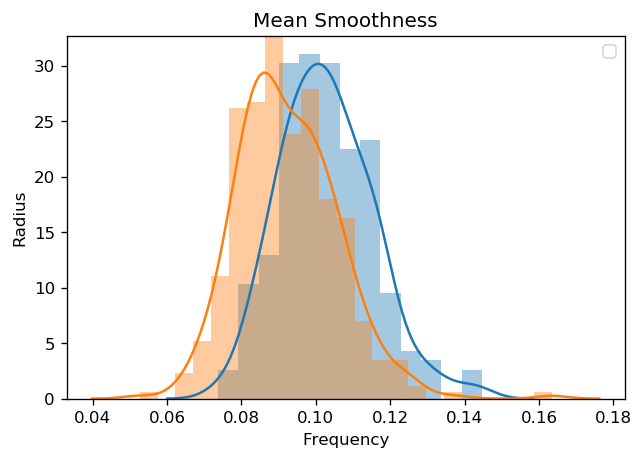

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


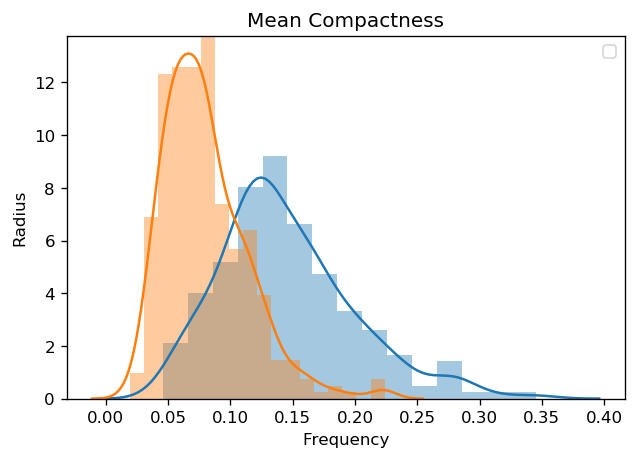

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


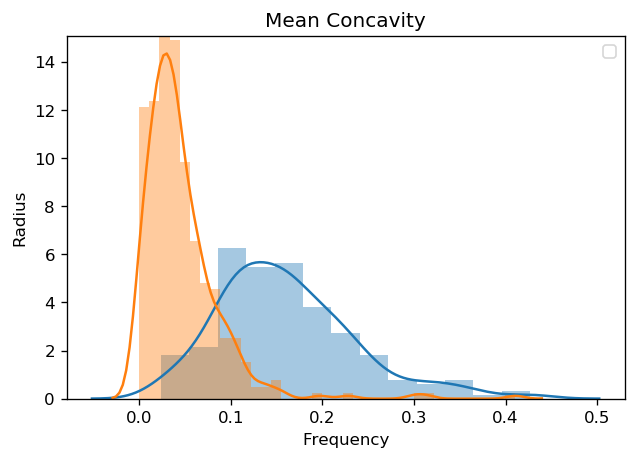

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


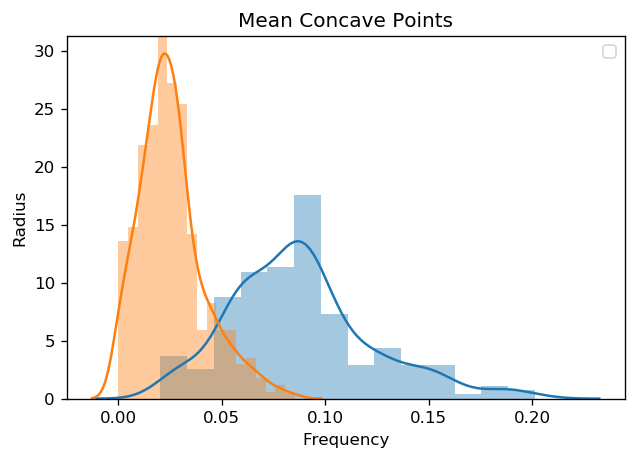

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


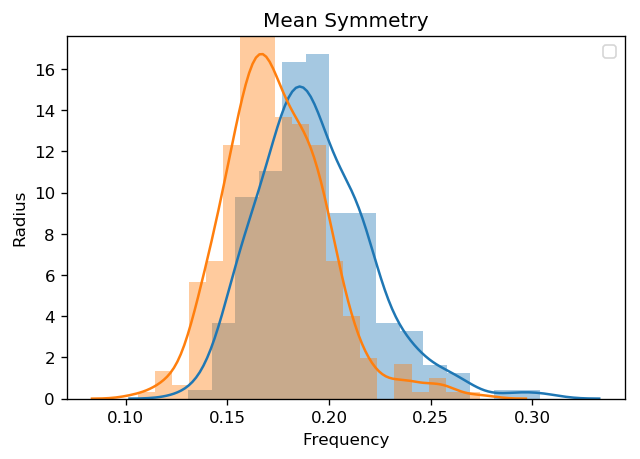

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


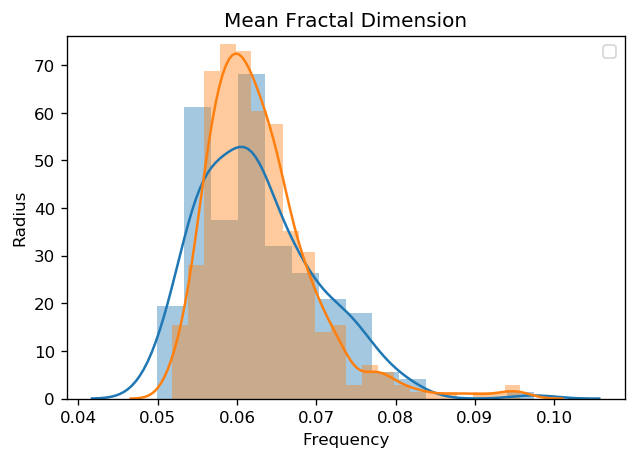

In [164]:
dist_plot("Mean Radius")
dist_plot("Mean Texture")
dist_plot("Mean Perimeter")
dist_plot("Mean Area")
dist_plot("Mean Smoothness")
dist_plot("Mean Compactness")
dist_plot("Mean Concavity")
dist_plot("Mean Concave Points")
dist_plot("Mean Symmetry")
dist_plot("Mean Fractal Dimension")

Here I use a heatmap to look at the correlation of the various features with each other. These can be used to examine which features should be kept and which should be dropped.

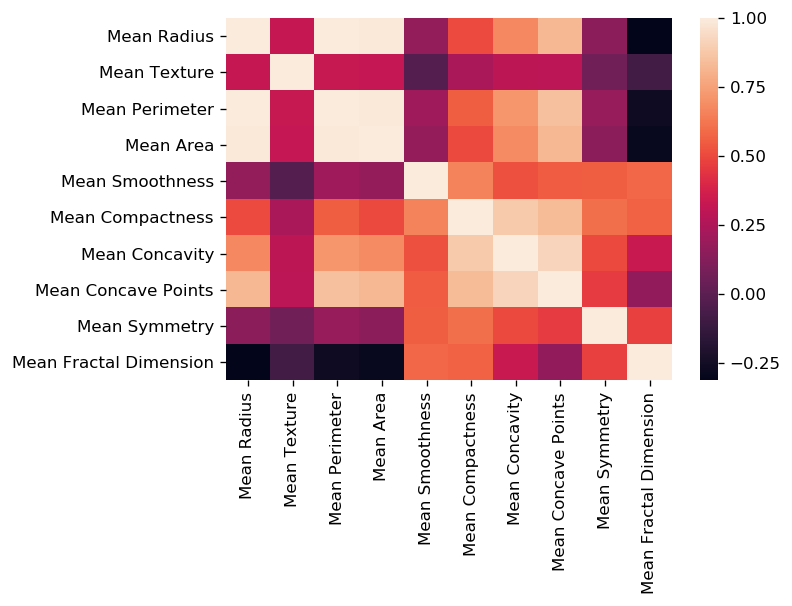

In [165]:
y = data["Diagnosis"]
data = data.drop(["Diagnosis","ID","Radius SE", "Texture SE","Perimeter SE","Area SE","Smootheness Se"
               ,"Compactness SE","Concavity SE","Concave Points SE","Symmetry SE","Fractal Dimension SE", "Worst Radius","Worst Texture","Worst Perimeter","Worst Area",
               "Worst Smoothness", "Worst Compactness", "Worst Concavity","Worst Concave Points","Worst Symmetry","Worst Fractial Dimension"], axis=1)
c = data.corr()
sns.heatmap(c)



It is better to have features that are less correlated with each other. This is because less correlated features allow for better learning for the machine learning model used. If features are too correlated, accurate results cannot be predicted because the model cannot determine which features to use when calculting the predicted the values.

I would remove all the Radius and Worst Features because I believe those are not as important as the mean features. In addition because there seems to be high correlations between Mean Radius and Mean Area, as well as Mean Radius and Mean Perimeter, so I will also be dropping Mean Area and Mean Perimeter.

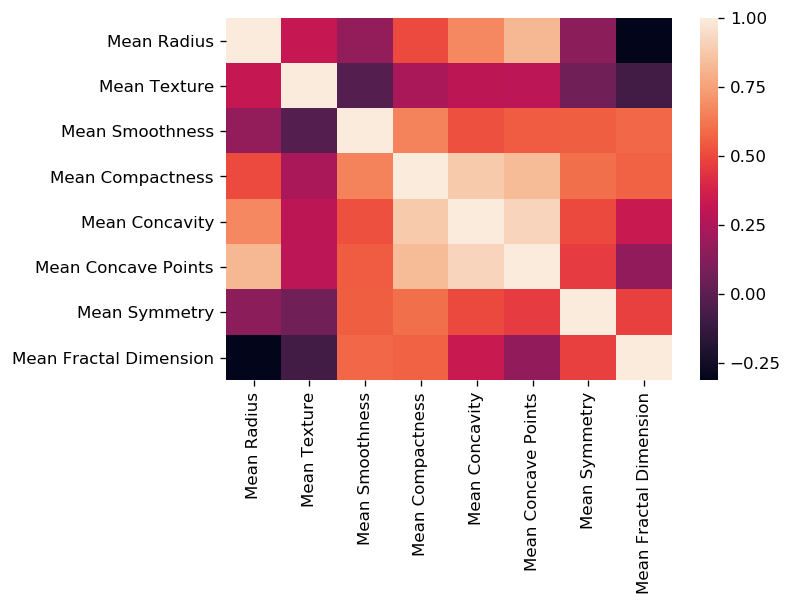

In [166]:
data = data.drop("Mean Perimeter", axis=1)
data = data.drop("Mean Area",axis = 1)
c = data.corr()
sns.heatmap(c)

Now we can see that the correlations are much better and we will have a lot of feature with correlations of less than one

# Step 3: Logistic Regression Model
We begin our prediction by using a Logistic Regression Model to predict Malignancy. Based on the results of the heatmap, I will be doing a Multivariate Logistic Regression with Mean Radius, Mean Texture, Mean Smoothness, Mean Compactness , Mean Concavity, Mean Symmetry and Mean Fractial Dimension.

In [178]:
reg = linear_model.LogisticRegression()
le = preprocessing.LabelEncoder()
y = le.fit_transform(y) 
data_processed_subset = data[['Mean Radius','Mean Texture','Mean Smoothness','Mean Compactness','Mean Concavity','Mean Symmetry','Mean Fractal Dimension']]
reg.fit(data_processed_subset,y.reshape(-1,1))
print(reg.intercept_, reg.coef_)

[-8.31048662] [[ 0.45166054  0.04835382 -0.03755576  2.03499815  3.82227172 -0.22323824
  -0.33706669]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Here are the coeffcients from the model. Now we score our model to quantify the quality of our prediction.

In [179]:
reg.score(data_processed_subset,y.reshape(-1,1))

0.9050966608084359

We have a score of about 0.901. This is a great score for our predictive model. 

In [180]:
reg = linear_model.LogisticRegression()
scores = model_selection.cross_val_score(reg, data_processed_subset,y.reshape(-1,1), cv=20)
print(f'mean: {scores.mean()}, stdev: {scores.std()}')

mean: 0.9020616675789089, stdev: 0.05831511007164324


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The mean and standard deviation from the cross validation scores show we have a great model.

# Step 4: Random Forest Classifier
Here we will utilize a Random Forest Classifier for our second model.

We pass in parameters to use for our classifier.

In [181]:
forest = RandomForestClassifier()
parameters = {
    'n_estimators': [6, 8, 10, 12],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1,5,10]
}
cv = GridSearchCV(forest,parameters,cv=3)
cv.fit(data,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [6, 8, 10, 12], 'max_features': ['sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 5, 10, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [182]:
print(cv.best_score_)
print(cv.best_params_)

0.9472759226713533
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 6}


This is a great score for the model. In addition to this we get the best parameters to use.

We build the training and testing sets for the X and Y values.

In [183]:
X_train = data_processed_subset[::2]
X_test = data_processed_subset[1::2]
y_train = y[::2].reshape(-1,1)
y_test = y[1::2].reshape(-1,1)

We rebuild the RandomForestClassifier with the best parameters.

In [184]:
forest = RandomForestClassifier(**cv.best_params_)
forest.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [185]:
y_true = forest.predict(X_test)

In [186]:
print(accuracy_score(y_test,y_true))

0.8908450704225352


An accuracy score of .89 is good. It shows that our test data is similar to predicted data, meaning our model was mostly accurate.

Text(0,0.5,'Importance')

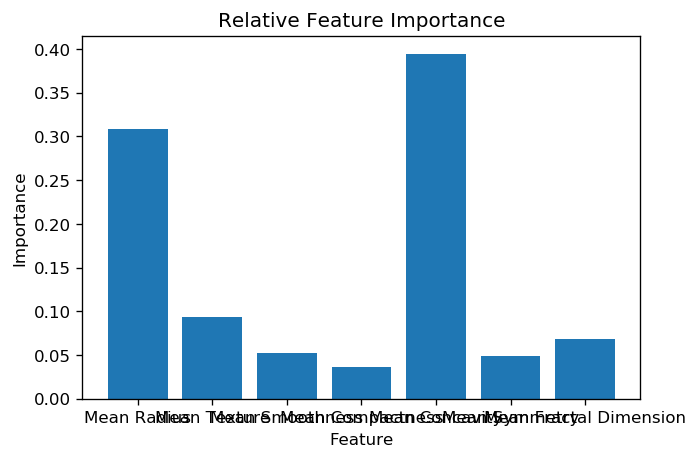

In [187]:
plt.bar(data_processed_subset.columns,forest.feature_importances_)
plt.title("Relative Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")

The formating is poor, but it can be seen that Mean Radius had a high importance in the classifier.

In [188]:
forest = RandomForestClassifier()
scores = model_selection.cross_val_score(forest,data_processed_subset,y)
print(f'mean: {scores.mean()}, stdev: {scores.std()}')

mean: 0.9384851016429963, stdev: 0.015105563357780337


The mean and standard deviation are strong. The Classifier used had good accuracy, and was a great predictor.

# 5: Conclusion and Next Steps

In the end, through the models used, we can see the important factors that need to be considered to accurately predict whether a tumor is malignant or not. The performance of the Random Forest Classifier was stronger than the performance of the Multivariate Logistic Regression model. This can be seen cause of the mean of the cross validation score of the Random Foresst Classifier was higher than the mean of the cross validation score of the Logistic Regression Model.

There are several ways to improve upon the work done here. One way to improve would be to use an additional complex model.  In addition there is a lot of potential for a application to be developed for use in a clincal enviornment. A doctor could conduct analysis on a tumor, and based on the key features mesaured, it could be predicted wheter or not that patient has a benign of malignant tumor. This would require a lot more clinical data to be acquired, but this is an exciting application which could help millions of patients.